Connected to myenv (Python 3.12.5)

2.2.3


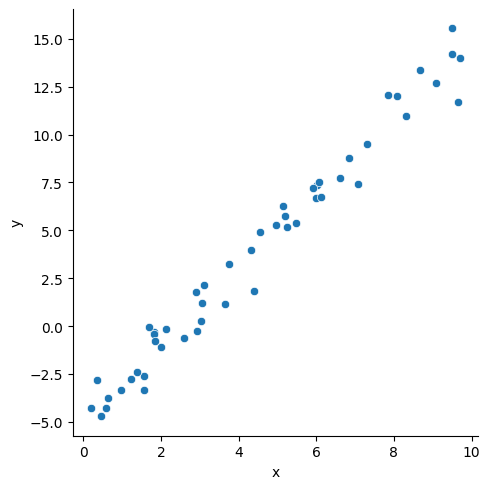

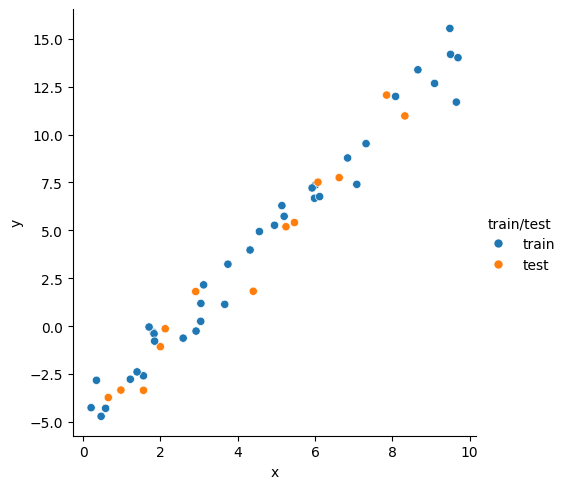

In [ ]:
## Sci-kit learn

import pandas as pd
print(pd.__version__)


data = pd.read_csv("https://bristol-training.github.io/applied-data-analysis-in-python/data/linear.csv")
data.head()

data.count()

import seaborn as sns

sns.relplot(data=data, x="x", y="y")

from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)
model

X = data[["x"]]
y = data["y"]
model.fit(X, y)

pred = pd.DataFrame({"x": [0, 10]})  # Make a new DataFrame containing the X values
pred["y"] = model.predict(pred)  # Make a prediction and add that data into the table
pred


## Overfitting models

import pandas as pd

data = pd.read_csv("https://bristol-training.github.io/applied-data-analysis-in-python/data/linear.csv")
data
X = data[["x"]]
y = data["y"]

from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=42)

# check train and test variables 75-25 split to train/test
train_y
test_y

import seaborn as sns

# Label the original DataFrame with the test/train split
# This is just used for plotting purposes
data.loc[train_X.index, "train/test"] = "train"
data.loc[test_X.index, "train/test"] = "test"

sns.relplot(data=data, x="x", y="y", hue="train/test")

In [ ]:
import seaborn as sns

sns.scatterplot(data=data, x="x1", y="x2", hue="y", palette="Dark2")

ValueError: Could not interpret value `x1` for `x`. An entry with this name does not appear in `data`.

<Axes: xlabel='x1', ylabel='x2'>

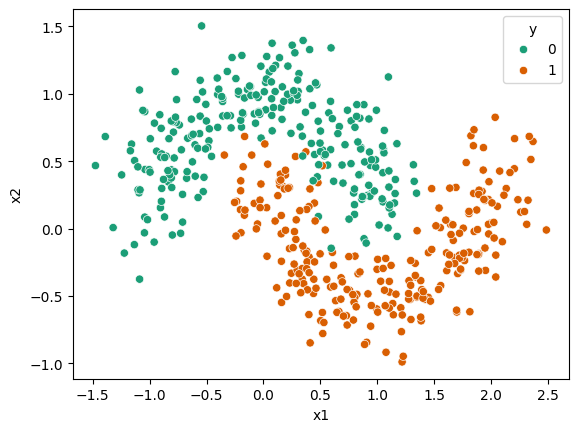

In [ ]:
import pandas as pd

data = pd.read_csv("https://bristol-training.github.io/applied-data-analysis-in-python/data/moons.csv")
data.head()

import seaborn as sns

sns.scatterplot(data=data, x="x1", y="x2", hue="y", palette="Dark2")

<Axes: xlabel='x1', ylabel='x2'>

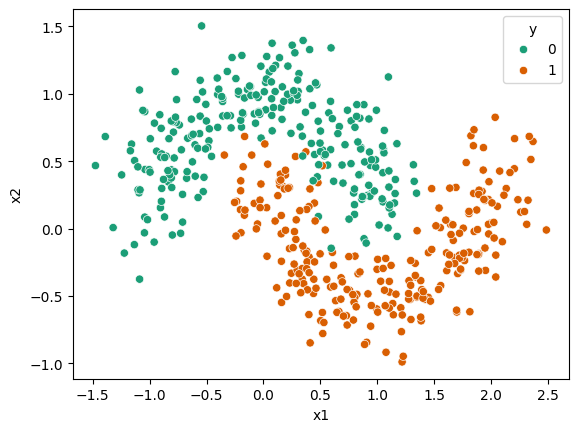

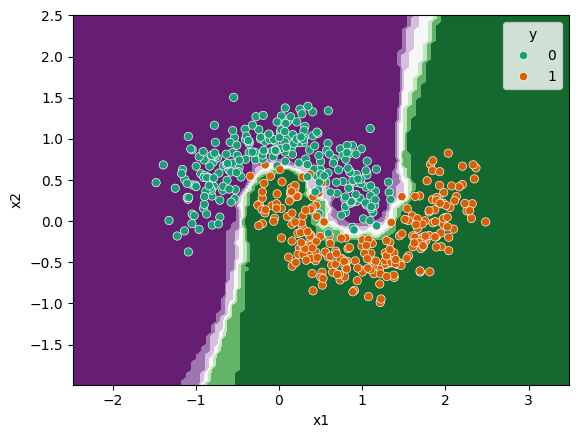

In [ ]:
import pandas as pd

data = pd.read_csv("https://bristol-training.github.io/applied-data-analysis-in-python/data/moons.csv")
data.head()

import seaborn as sns

sns.scatterplot(data=data, x="x1", y="x2", hue="y", palette="Dark2")


X = data[["x1", "x2"]]
y = data["y"]

# Split data into train and test

from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y)

from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)
model.fit(train_X, train_y)

model.score(test_X, test_y)

from sklearn.inspection import DecisionBoundaryDisplay

DecisionBoundaryDisplay.from_estimator(model, X, cmap="PRGn")
sns.scatterplot(data=X, x="x1", y="x2", hue=y, palette="Dark2")

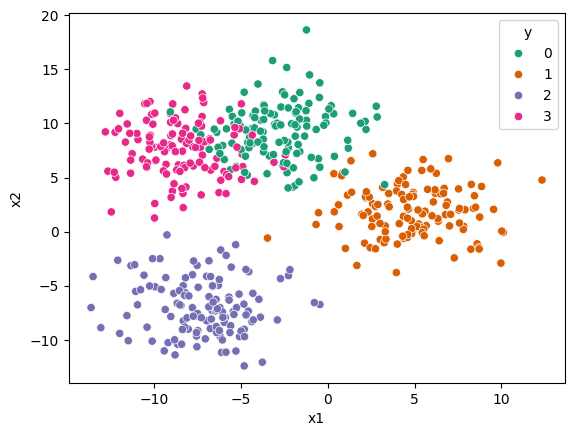

In [ ]:

import pandas as pd

data = pd.read_csv("https://bristol-training.github.io/applied-data-analysis-in-python/data/blobs.csv")
X = data[["x1", "x2"]]
y = data["y"]

import seaborn as sns

sns.scatterplot(data=data, x="x1", y="x2", hue="y", palette="Dark2")

from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

hyperparameters = {
    "n_neighbors" : range(1, 175),
}
model = GridSearchCV(KNeighborsClassifier(), hyperparameters)
model.fit(train_X, train_y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 175)})

<Axes: xlabel='param_n_neighbors', ylabel='mean_test_score'>

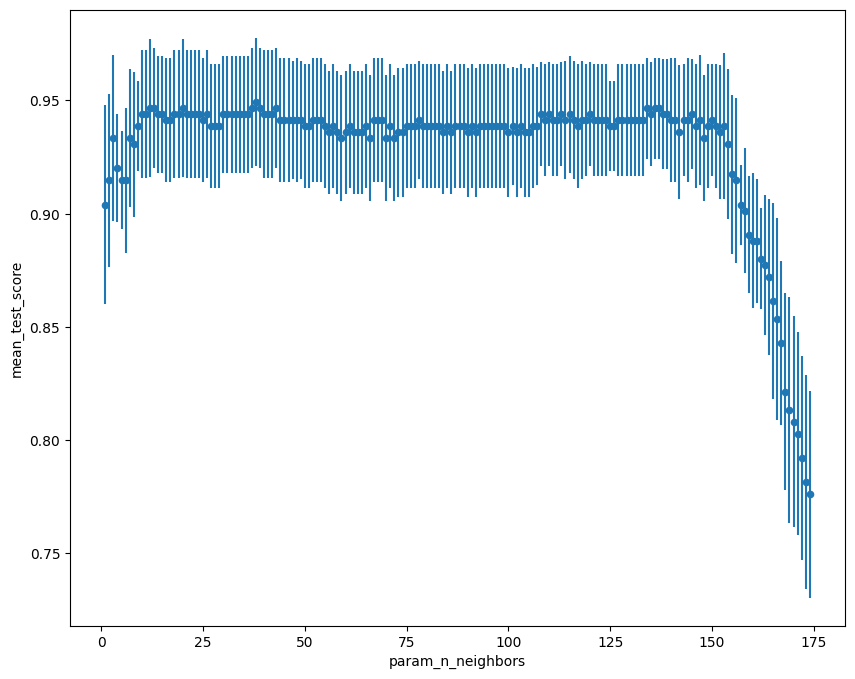

In [ ]:
cv_results = pd.DataFrame(model.cv_results_)
cv_results.plot.scatter("param_n_neighbors", "mean_test_score", yerr="std_test_score", figsize=(10,8))

In [ ]:
cv

NameError: name 'cv' is not defined

In [ ]:
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001884,0.002420,0.002389,0.000652,1,{'n_neighbors': 1},0.880000,0.946667,0.893333,0.960000,0.840000,0.904000,0.044141,156
1,0.000581,0.000133,0.001735,0.000117,2,{'n_neighbors': 2},0.893333,0.960000,0.893333,0.960000,0.866667,0.914667,0.038274,153
2,0.000508,0.000014,0.001652,0.000020,3,{'n_neighbors': 3},0.920000,0.960000,0.920000,0.986667,0.880000,0.933333,0.036757,141
3,0.000516,0.000036,0.001742,0.000167,4,{'n_neighbors': 4},0.906667,0.933333,0.906667,0.960000,0.893333,0.920000,0.023851,150
4,0.000534,0.000063,0.001717,0.000040,5,{'n_neighbors': 5},0.893333,0.946667,0.906667,0.933333,0.893333,0.914667,0.021664,153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,0.000504,0.000032,0.003120,0.000326,170,{'n_neighbors': 170},0.840000,0.813333,0.813333,0.853333,0.720000,0.808000,0.046648,170
170,0.000717,0.000368,0.003312,0.000275,171,{'n_neighbors': 171},0.826667,0.800000,0.813333,0.853333,0.720000,0.802667,0.044939,171
171,0.000732,0.000354,0.003366,0.000547,172,{'n_neighbors': 172},0.813333,0.800000,0.800000,0.840000,0.706667,0.792000,0.045097,172
172,0.000502,0.000025,0.003650,0.000589,173,{'n_neighbors': 173},0.813333,0.800000,0.773333,0.826667,0.693333,0.781333,0.047404,173


In [ ]:
from sklearn.datasets import fetch_california_housing

housing, target = fetch_california_housing(as_frame=True, return_X_y=True)

housing.head()
housing.corr()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000


In [ ]:
corr = housing.corr()
corr["MedInc"]["AveRooms"]

np.float64(0.3268954316412978)

<Axes: >

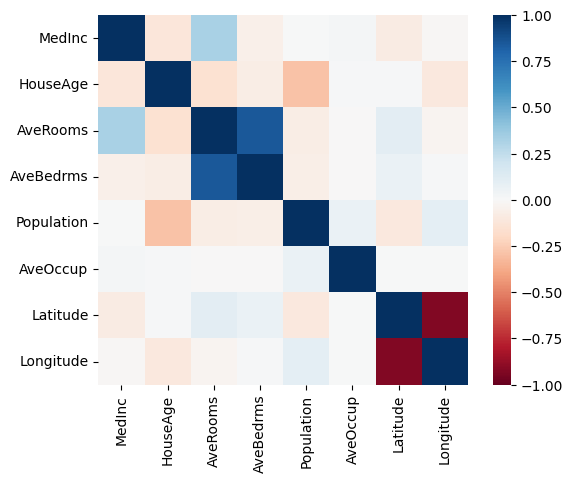

In [ ]:
import seaborn as sns

sns.heatmap(corr, vmin=-1.0, vmax=1.0, square=True, cmap="RdBu")

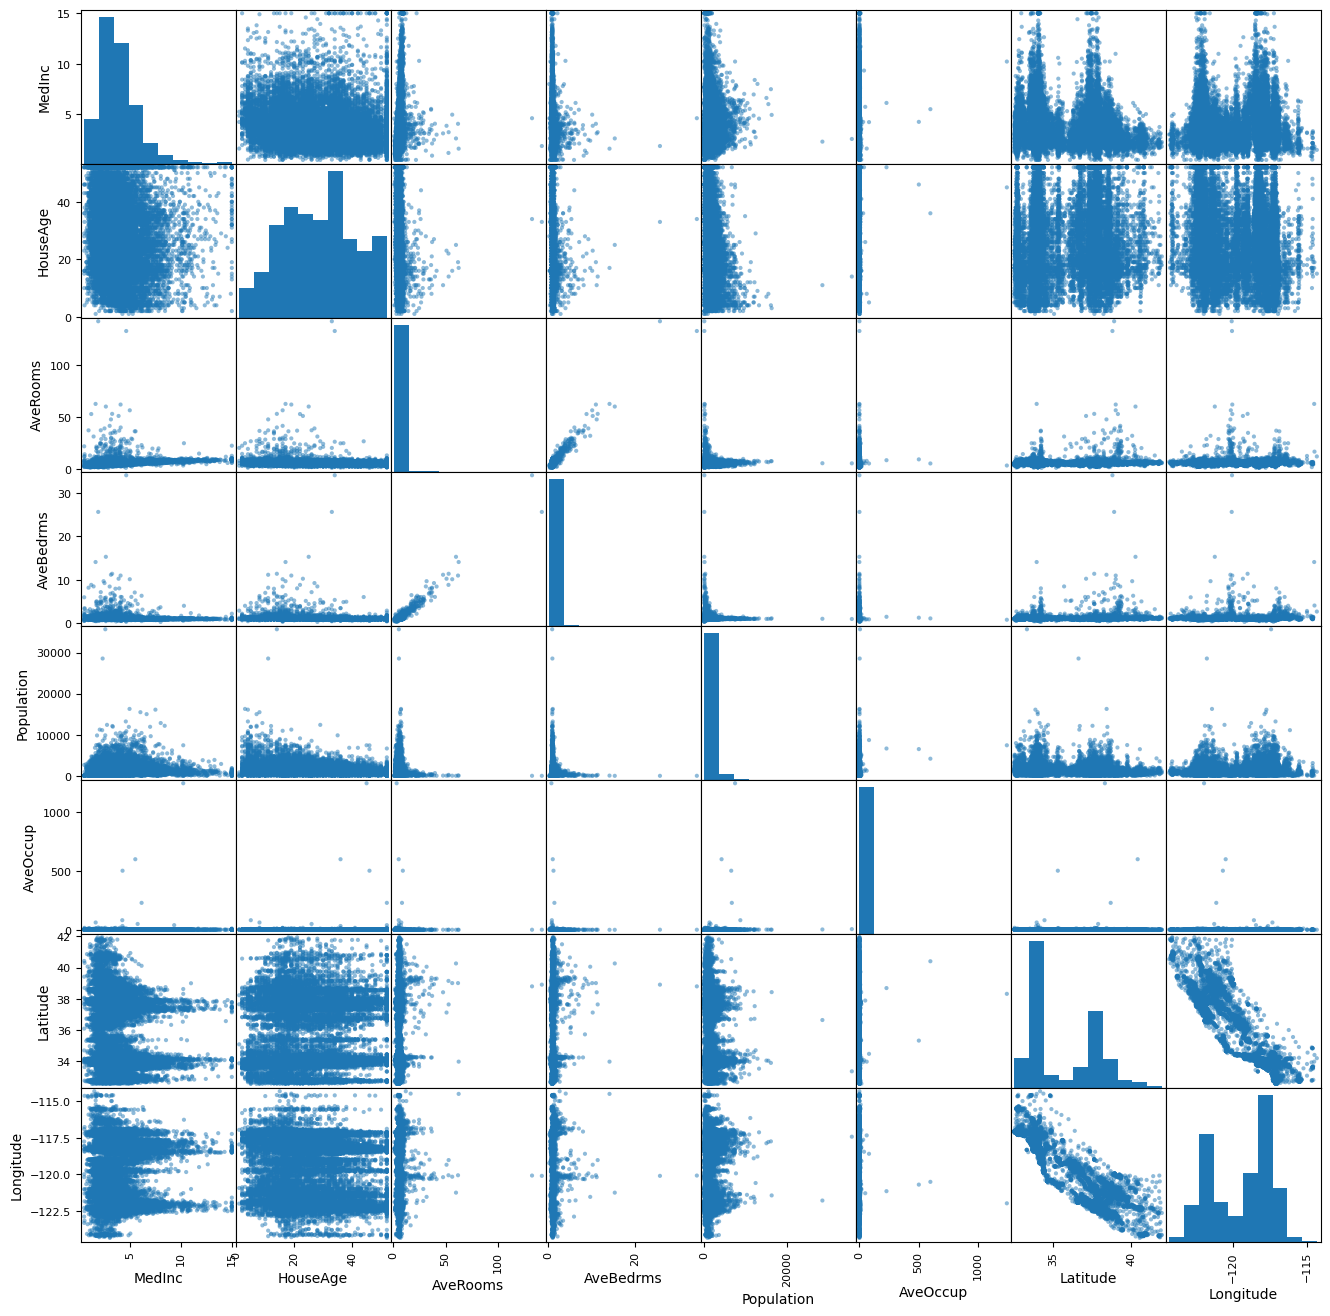

In [ ]:
from pandas.plotting import scatter_matrix

a = scatter_matrix(housing, figsize=(16, 16))